In [ ]:
%pip install code_bert_score

In [1]:
import code_bert_score
from code_bert_score import plot_example

In [6]:
sources = "Give me an IEC 61131-3 structured text function block BURNER with following functionality. BURNER is a control interface for oil or gas burner operating at kilowatt hour meter and counter. The module controls a two-stage burner with optional fuel oil warming. The input IN is the control input that starts the burner only when the input OVER_TEMP is FALSE. OVER_TEMP is the boiler thermostat protection, which gets TRUE, if the boiler temperature has reached the maximum temperature. A burner start begins with the fuel oil warming, by PRE_HEAT gets TRUE. Then it waits for a signal at the input OIL_TEMP. If the signal OIL_TEMP is within the PRE_HEAT_TIME not TRUE and the oil temperature is not reached, the start sequence is interrupted and the output FAIL is set to TRUE. At the same time the error is spent at the Output STATUS. After fuel oil warming the motor gets on and sets the fan in operation. Then after a defned time the ignition is switched and the oil valve is opened. If no response of the fame sensor after specifed time (SAFETY_TIME), the module shows a failure. A fault is signaled even if the fame sensor responds before the ignition. If after a successful ignition, the fame breaks of and the set-variable MULTIPLE_IGNITION = TRUE, immediately a ignition is started. A second stage is activated automatically after the time STAGE2_DELAY when the input STAGE2 is TRUE. If a fault occurs, then the module is locked for a fxed time LOCKOUT_TIME and only after this time a RST can start the operation again. During the LOCKOUT_TIME, the RST Input must be FALSE. A TRUE at input OVER_TEMP stops immediately every action and reports the error 9. The status output indicates the current state of the module: 110 = Wait for Start signal ( Standby ); 111 = startup sequence is executed; 112 = burner runs on stage 1; 113 = burner runs at stage 2. A number of error conditions are provided at the output STATUS, if an error is present:1 = fuel oil warming has not responded within the PRE_HEAT_TIME; 2 = fame sensor is active during fuel oil warming (PRE_HEAT_TIME); 3 = fame sensor is active during the aeration period (PRE_VENTILATION_TIME); 4 = safety time ( Safety_Time) was passed without a fame; 5 = fame stops in operation; 9 = boiler overheating contact has tripped. Trace recording of a normal boot sequence: The signal IN starts the sequence with the output PRE_HEAT. After reaching the oil temperature (OIL_TEMP = TRUE), the engine started and the PRE_VENTILATION_TIME (time from engine start until oil valve is open) awaited. After an adjustable time (PPR_IGNITION_TIME) before opening the oil valve, the ignition is turned on. The ignition is then on until the POST_IGNITION_TIME has expired. The operating time per stage is measured independently in seconds. The timing diagram refects the exact time line: t1 = pre-heating (PRE_HEAT_TIME); t2 = prepurge (PRE_VENT_Time); t3 = pre ignition time (PRE_IGNITE_TIME); t4 = safety time (SAFETY_TIME); t5 = post ignition time (POST_IGNITE_TIME); t6 = delay for stage 2 (STAGE2_DELAY)"
file = open('../PLC_Code/21.st')
ref = file.read()
file.close()
for model in ["ChatGPT_3.5", "Bard", "CodeLlama", "Platypus2", "StableCode"]:
    print(model)
    for j in range(1,3):
        print(j,':')
        for run in ["first run", "second run", "third run"]:
            path = f"../Code#{j}/{model}/{run}/21.st"
            file = open(path)
            pred = file.read()
            file.close()
            a,b,c,d = code_bert_score.score(cands=[pred], refs=[ref], lang="python",sources=[sources])
            print(a.item(),',',b.item(),',',c.item(),',',d.item())
    print('------------------------')
            

ChatGPT_3.5
1 :
0.7952167391777039 , 0.7431837320327759 , 0.7683203220367432 , 0.7480786442756653
0.7900776863098145 , 0.7639600038528442 , 0.7767993807792664 , 0.7664938569068909
0.8103911876678467 , 0.7467043399810791 , 0.7772453427314758 , 0.7526190876960754
2 :
0.8801091313362122 , 0.8300824165344238 , 0.8543640971183777 , 0.834827721118927
0.8603262305259705 , 0.814712405204773 , 0.8368982672691345 , 0.8190549612045288
0.8813807368278503 , 0.8038661479949951 , 0.8408406972885132 , 0.8109986186027527
------------------------
Bard
1 :
0.8173359036445618 , 0.744641125202179 , 0.7792969346046448 , 0.7513235211372375
0.8405845165252686 , 0.7629603147506714 , 0.7998936176300049 , 0.7700716257095337
0.7935143113136292 , 0.7375664114952087 , 0.764518141746521 , 0.7428036332130432
2 :
0.885489821434021 , 0.7986133098602295 , 0.8398107290267944 , 0.806526243686676
0.8692032694816589 , 0.8008785843849182 , 0.8336433172225952 , 0.8072238564491272
0.899113655090332 , 0.7971338033676147 , 0.845

In [3]:
predictions = [
"""
PROGRAM AlarmControl
VAR
    xAlarm1 : BOOL; (* Variable for Alarm 1 *)
    xAlarm2 : BOOL; (* Variable for Alarm 2 *)
    xAllOn : BOOL; (* Signal to set all alarms on *)
    xAllOff : BOOL; (* Signal to set all alarms off *)
END_VAR

(* Turn on both alarms if xAllOn is activated *)
IF xAllOn THEN
    xAlarm1 := TRUE;
    xAlarm2 := TRUE;
    xAllOn := FALSE; (* Turn off the signal after setting alarms *)
END_IF

(* Turn off both alarms if xAllOff is activated *)
IF xAllOff THEN
    xAlarm1 := FALSE;
    xAlarm2 := FALSE;
    xAllOff := FALSE; (* Turn off the signal after resetting alarms *)
END_IF

END_PROGRAM
"""]
refs = [ 
"""
VAR
	xAllOn : BOOL;
	xAllOff : BOOL;

	xAlarm1 : BOOL;
    xAlarm2 : BOOL;
END_VAR

IF xAllOn THEN
	xAllOn := FALSE;
	
	xAlarm1 := TRUE;
	xAlarm2 := TRUE;
END_IF

IF xAllOff THEN
	xAllOff := FALSE;
	
	xAlarm1 := FALSE;
    xAlarm2 := FALSE;
END_IF
"""]
sources = ["Give me an IEC 61131-3 structured text program with two alarms represented by the variables xAlarm1 and xAlarm2. With the signal xAllOn all alarms should be set to TRUE and the signal should be turned off. With the signal xAllOff all alarms should be set to FALSE and the signal should be turned off."]
pred_results = code_bert_score.score(cands=predictions, refs=refs, lang="en",sources=sources)
print(pred_results)
pred_results = code_bert_score.score(cands=predictions, refs=refs, lang="python",sources=sources)
print(pred_results)
# plot_example(candidate=predictions[0], reference=refs[0], lang='python')

(tensor([0.8190]), tensor([0.9239]), tensor([0.8683]), tensor([0.9122]))
(tensor([0.8013]), tensor([0.9387]), tensor([0.8646]), tensor([0.9229]))


(tensor([0.7355]), tensor([0.7841]), tensor([0.7590]), tensor([0.7790]))


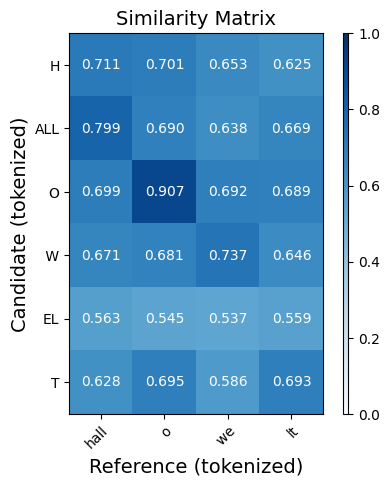

In [4]:
import code_bert_score
from code_bert_score import plot_example
refs = ["hallo welt"]
pred = ["HALLO WELT"]
result = code_bert_score.score(pred,refs,lang='en')
print(result)
plot_example(pred[0],refs[0],lang='en')

In [11]:
import numpy as np
def pass_at_k(n, c, k): 
  """ 
  :param n: total number of samples 
  :param c: number of correct samples 
  :param k: k in pass@$k$ 
  """ 
  if n - c < k: 
    return 1.0 
  return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))
                       
a = pass_at_k(60,5,1)
print(a)

0.25
